What is Structured Output?


- Unstructured output is the default format of responses from models like ChatGPT, typically plain text without a specific format or schema. For example, if you ask “What is the capital of India?” the output is a plain text sentence: “New Delhi is the capital of India.”

- Structured output, on the other hand, refers to responses formatted in a well-defined data structure, such as JSON, where information is organized with keys and values, making it easy to parse and use programmatically.
For example, instead of a free-text itinerary for Paris, a structured output could be a JSON array with dictionaries specifying time slots and activities. This organization allows easy integration with other systems.

### Benefits and Use Cases of Structured Output
- Data Extraction and Storage:
In scenarios like job portals (e.g., Naukri.com), users upload resumes, and an LLM can extract structured data such as candidate name, education marks, and previous companies in JSON format. This structured data can be stored in databases for efficient querying and management.

- API Development:
When building APIs that process large unstructured texts (e.g., product reviews on e-commerce platforms), LLMs can extract key points like pros, cons, topics discussed, and overall sentiment in structured form. This structured data can be served through APIs, allowing other applications to consume and analyze it easily.

- Building Intelligent Agents:
Agents are described as advanced chatbots with capabilities to perform tasks using tools. Structured output is critical here because tools require specific data formats (e.g., numerical inputs for calculators). The LLM processes user queries, generates structured outputs that tools can interpret, and then tools return results to the agent.

These use cases demonstrate that structured output allows LLMs to interact seamlessly with databases, APIs, and other software tools.

Types of LLMs and Generating Structured Output


- Models that support structured output natively (e.g., OpenAI GPT models) — these can be instructed to produce JSON or other formats directly.

- Models that do not support structured output natively — for these, additional techniques are needed to parse free-text output into structured formats.

### Models That Supoort Structured output

Methods to Define Structured Data Formats

- Typed Dictionary (TypedDict):
A Python feature to define dictionaries with specific key-value types. It helps editors provide autocomplete and type hints, improving code clarity. However, it does not enforce strict runtime type validation.

- Pydantic Models:
Pydantic is a powerful Python library for data validation and parsing. It enforces data types strictly at runtime, supports default values, optional fields, and validation constraints, making it ideal for robust applications and API development.

- JSON Schema:
A language-agnostic JSON format to describe data structures. It is useful when the project involves multiple programming languages (e.g., Python backend and JavaScript frontend) requiring a shared schema definition.

In [ ]:
## TypeDict
from dotenv import load_dotenv
from typing import TypedDict, Annotated, Optional, Literal
from langchain_groq import ChatGroq

llm = ChatGroq(model="qwen/qwen3-32b")

load_dotenv()



# schema
class Review(TypedDict):

    key_themes: Annotated[list[str], "Write down all the key themes discussed in the review in a list"]
    summary: Annotated[str, "A brief summary of the review"]
    sentiment: Annotated[Literal["pos", "neg"], "Return sentiment of the review either negative, positive or neutral"]
    pros: Annotated[Optional[list[str]], "Write down all the pros inside a list"]
    cons: Annotated[Optional[list[str]], "Write down all the cons inside a list"]
    name: Annotated[Optional[str], "Write the name of the reviewer"]
    

structured_model = llm.with_structured_output(Review)

result = structured_model.invoke("""I recently upgraded to the Samsung Galaxy S24 Ultra, and I must say, it’s an absolute powerhouse! The Snapdragon 8 Gen 3 processor makes everything lightning fast—whether I’m gaming, multitasking, or editing photos. The 5000mAh battery easily lasts a full day even with heavy use, and the 45W fast charging is a lifesaver.

The S-Pen integration is a great touch for note-taking and quick sketches, though I don't use it often. What really blew me away is the 200MP camera—the night mode is stunning, capturing crisp, vibrant images even in low light. Zooming up to 100x actually works well for distant objects, but anything beyond 30x loses quality.

However, the weight and size make it a bit uncomfortable for one-handed use. Also, Samsung’s One UI still comes with bloatware—why do I need five different Samsung apps for things Google already provides? The $1,300 price tag is also a hard pill to swallow.

Pros:
Insanely powerful processor (great for gaming and productivity)
Stunning 200MP camera with incredible zoom capabilities
Long battery life with fast charging
S-Pen support is unique and useful
                                 
Review by Thomas Patole
""")

print(result['name'])

Thomas Patole


In [5]:
result

{'cons': ['Large/heavy design makes one-handed use uncomfortable',
  'Pre-installed bloatware (multiple Samsung apps duplicating Google services)',
  'High price point of $1,300'],
 'key_themes': ['Flagship mobile performance',
  'Advanced camera technology',
  'Battery efficiency',
  'User interface experience',
  'Device ergonomics'],
 'name': 'Thomas Patole',
 'pros': ['Insanely powerful processor (great for gaming and productivity)',
  'Stunning 200MP camera with incredible zoom capabilities',
  'Long battery life with fast charging',
  'S-Pen support is unique and useful'],
 'sentiment': 'pos',
 'summary': 'The Samsung Galaxy S24 Ultra delivers exceptional performance and camera capabilities but faces criticism for its size/weight and bloatware.'}

- Annotated: Annotated is used to add metadata to a type. It allows you to attach extra information (such as descriptions or validation hints) to a type annotation.

- Optional: Optional[X] means that a value can either be of type X or None. It is equivalent to Union[X, None].

- Literal:Literal is used to specify that a value must be exactly one of a set of allowed constant values.

In [ ]:
# Pydantic
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict, Annotated, Optional, Literal
from pydantic import BaseModel, Field
from langchain_groq import ChatGroq

load_dotenv()
model = ChatGroq(model="qwen/qwen3-32b")
# schema
class Review(BaseModel):

    key_themes: list[str] = Field(description="Write down all the key themes discussed in the review in a list")
    summary: str = Field(description="A brief summary of the review")
    sentiment: Literal["pos", "neg"] = Field(description="Return sentiment of the review either negative, positive or neutral")
    pros: Optional[list[str]] = Field(default=None, description="Write down all the pros inside a list")
    cons: Optional[list[str]] = Field(default=None, description="Write down all the cons inside a list")
    name: Optional[str] = Field(default=None, description="Write the name of the reviewer")
    

structured_model = model.with_structured_output(Review)

result = structured_model.invoke("""I recently upgraded to the Samsung Galaxy S24 Ultra, and I must say, it’s an absolute powerhouse! The Snapdragon 8 Gen 3 processor makes everything lightning fast—whether I’m gaming, multitasking, or editing photos. The 5000mAh battery easily lasts a full day even with heavy use, and the 45W fast charging is a lifesaver.

The S-Pen integration is a great touch for note-taking and quick sketches, though I don't use it often. What really blew me away is the 200MP camera—the night mode is stunning, capturing crisp, vibrant images even in low light. Zooming up to 100x actually works well for distant objects, but anything beyond 30x loses quality.

However, the weight and size make it a bit uncomfortable for one-handed use. Also, Samsung’s One UI still comes with bloatware—why do I need five different Samsung apps for things Google already provides? The $1,300 price tag is also a hard pill to swallow.

Pros:
Insanely powerful processor (great for gaming and productivity)
Stunning 200MP camera with incredible zoom capabilities
Long battery life with fast charging
S-Pen support is unique and useful
                                 
Review by Thomas Patole
""")

print(result)


key_themes=['performance', 'camera technology', 'battery life', 'design ergonomics', 'software ecosystem'] summary='A high-end smartphone with exceptional processing power and camera capabilities, but its physical design and software bloatware may frustrate some users.' sentiment='pos' pros=['Insanely powerful processor (great for gaming and productivity)', 'Stunning 200MP camera with incredible zoom capabilities', 'Long battery life with fast charging', 'S-Pen support is unique and useful'] cons=['Uncomfortable weight and size for one-handed use', 'Samsung One UI includes redundant bloatware apps', 'Premium price point of $1,300'] name='Thomas Patole'


In [8]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict, Annotated, Optional, Literal
from pydantic import BaseModel, Field
from langchain_groq import ChatGroq


load_dotenv()

model = ChatGroq(model="qwen/qwen3-32b")

# schema
json_schema = {
  "title": "Review",
  "type": "object",
  "properties": {
    "key_themes": {
      "type": "array",
      "items": {
        "type": "string"
      },
      "description": "Write down all the key themes discussed in the review in a list"
    },
    "summary": {
      "type": "string",
      "description": "A brief summary of the review"
    },
    "sentiment": {
      "type": "string",
      "enum": ["pos", "neg"],
      "description": "Return sentiment of the review either negative, positive or neutral"
    },
    "pros": {
      "type": ["array", "null"],
      "items": {
        "type": "string"
      },
      "description": "Write down all the pros inside a list"
    },
    "cons": {
      "type": ["array", "null"],
      "items": {
        "type": "string"
      },
      "description": "Write down all the cons inside a list"
    },
    "name": {
      "type": ["string", "null"],
      "description": "Write the name of the reviewer"
    }
  },
  "required": ["key_themes", "summary", "sentiment"]
}


structured_model = model.with_structured_output(json_schema)

result = structured_model.invoke("""I recently upgraded to the Samsung Galaxy S24 Ultra, and I must say, it’s an absolute powerhouse! The Snapdragon 8 Gen 3 processor makes everything lightning fast—whether I’m gaming, multitasking, or editing photos. The 5000mAh battery easily lasts a full day even with heavy use, and the 45W fast charging is a lifesaver.

The S-Pen integration is a great touch for note-taking and quick sketches, though I don't use it often. What really blew me away is the 200MP camera—the night mode is stunning, capturing crisp, vibrant images even in low light. Zooming up to 100x actually works well for distant objects, but anything beyond 30x loses quality.

However, the weight and size make it a bit uncomfortable for one-handed use. Also, Samsung’s One UI still comes with bloatware—why do I need five different Samsung apps for things Google already provides? The $1,300 price tag is also a hard pill to swallow.

Pros:
Insanely powerful processor (great for gaming and productivity)
Stunning 200MP camera with incredible zoom capabilities
Long battery life with fast charging
S-Pen support is unique and useful
                                 
Review by Thomas Patole
""")

print(result)

{'cons': ['Weight and size make it uncomfortable for one-handed use', 'Samsung’s One UI still comes with bloatware', '$1,300 price tag is expensive'], 'key_themes': ['Performance (Snapdragon 8 Gen 3)', 'Camera quality (200MP, night mode, zoom)', 'Battery life and fast charging', 'S-Pen integration', 'Build ergonomics', 'Software bloatware', 'Price competitiveness'], 'name': 'Thomas Patole', 'pros': ['Insanely powerful processor (great for gaming and productivity)', 'Stunning 200MP camera with incredible zoom capabilities', 'Long battery life with 45W fast charging', 'S-Pen support is unique and useful'], 'sentiment': 'pos', 'summary': 'The Samsung Galaxy S24 Ultra is a high-performance flagship with exceptional processing power, a stunning 200MP camera, and all-day battery life. While its weight, bloatware, and premium price tag are drawbacks, the device excels in productivity, photography, and fast charging, making it a compelling choice for power users.'}


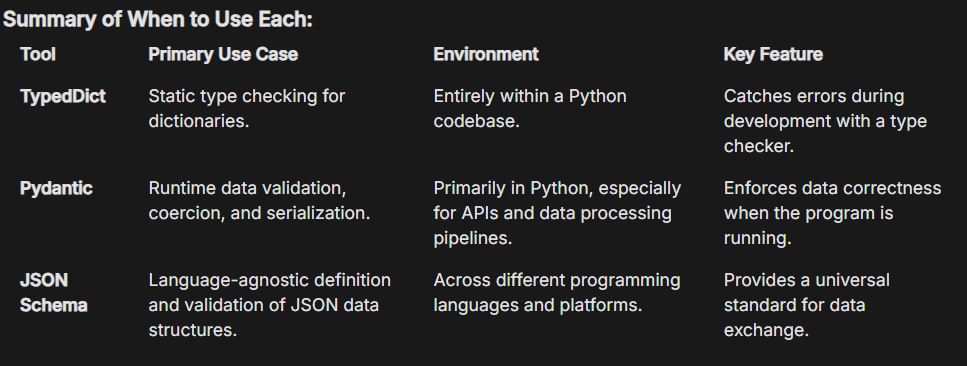

### Returning structured output

With a schema defined, we need a way to instruct the model to use it. While one approach is to include this schema in the prompt and ask nicely for the model to use it, this is not recommended. Several more powerful methods that utilizes native features in the model provider's API are available.
1. Using tool calling
2. JSON mode

https://python.langchain.com/docs/concepts/structured_outputs/

In [1]:
from pydantic import BaseModel, Field
class ResponseFormatter(BaseModel):
    """Always use this tool to structure your response to the user."""
    answer: str = Field(description="The answer to the user's question")
    followup_question: str = Field(description="A followup question the user could ask")

In [16]:
from langchain_groq import ChatGroq
model = ChatGroq(model="qwen/qwen3-32b")
# Bind responseformatter schema as a tool to the model
model_with_tools = model.bind_tools([ResponseFormatter])
# Invoke the model
ai_msg = model_with_tools.invoke("What is the powerhouse of the cell?")

In [19]:
ai_msg.additional_kwargs['tool_calls']

[{'id': 'r218fam6j',
  'function': {'arguments': '{"answer":"The powerhouse of the cell is the mitochondria, as it generates most of the cell\'s supply of adenosine triphosphate (ATP), used as a source of chemical energy.","followup_question":"How do mitochondria produce energy through cellular respiration?"}',
   'name': 'ResponseFormatter'},
  'type': 'function'}]

### JSON mode
some model providers support a feature called JSON mode. This supports JSON schema definition as input and enforces the model to produce a conforming JSON output. 

In [ ]:
from langchain_openai import ChatOpenAI
model = ChatOpenAI(model="gpt-4o").with_structured_output(method="json_mode")
ai_msg = model.invoke("Return a JSON object with key 'random_ints' and a value of 10 random ints in [0-99]")
ai_msg


{'random_ints': [45, 67, 12, 34, 89, 23, 78, 56, 90, 11]}

In [3]:
ai_msg

{'random_ints': [27, 49, 3, 98, 14, 76, 5, 62, 33, 88]}

### Models that do not support structured output


In [1]:

from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

load_dotenv()


model = ChatOpenAI()

# 1st prompt -> detailed report
template1 = PromptTemplate(
    template='Write a detailed report on {topic}',
    input_variables=['topic']
)

# 2nd prompt -> summary
template2 = PromptTemplate(
    template='Write a 5 line summary on the following text. /n {text}',
    input_variables=['text']
)

prompt1 = template1.invoke({'topic':'black hole'})

result = model.invoke(prompt1)

prompt2 = template2.invoke({'text':result.content})

result1 = model.invoke(prompt2)

print(result1.content)



Black holes are mysterious astronomical objects with immense gravitational pull that trap even light within their event horizon. They come in various sizes, from stellar to supermassive, and play a crucial role in shaping galaxies and the universe. Black holes are challenging to study as they are invisible, but astronomers use indirect methods to detect and study them. Recent advancements, including the detection of gravitational waves, have provided further evidence for the existence of black holes and continue to expand our understanding of these enigmatic objects. Overall, black holes remain a captivating subject that pushes the boundaries of our knowledge of the cosmos.


In [2]:
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

load_dotenv()


model = ChatOpenAI()

# 1st prompt -> detailed report
template1 = PromptTemplate(
    template='Write a detailed report on {topic}',
    input_variables=['topic']
)

# 2nd prompt -> summary
template2 = PromptTemplate(
    template='Write a 5 line summary on the following text. /n {text}',
    input_variables=['text']
)

parser = StrOutputParser()

chain = template1 | model | parser | template2 | model | parser

result = chain.invoke({'topic':'black hole'})

print(result)


Black holes are regions in space with immense gravitational pull, formed by the collapse of massive stars. They consist of a singularity, event horizon, and accretion disk. There are three main types: stellar, supermassive, and intermediate black holes. They distort spacetime, emit radiation, and are observed through their effects on neighboring objects. Black holes remain a topic of intense research, challenging our understanding of the universe and fundamental forces that govern it.


In [ ]:
## Jason Parser
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser

load_dotenv()


model = ChatOpenAI()

parser = JsonOutputParser()
# 1st prompt -> detailed report
template = PromptTemplate(
    template='Give me 5 facts about {topic} \n {format_instruction}',
    input_variables=['topic'],
    partial_variables={'format_instruction': parser.get_format_instructions()}
)


chain = template | model | parser

result = chain.invoke({'topic':'black hole'})

print(result)


{'fact1': 'Black holes are regions in space where gravity is so strong that nothing, not even light, can escape.', 'fact2': 'Black holes are formed when massive stars collapse in on themselves.', 'fact3': 'There are different types of black holes, including stellar black holes, supermassive black holes, and intermediate black holes.', 'fact4': 'Black holes can distort time and space around them, a phenomenon known as gravitational time dilation.', 'fact5': 'Despite their name, black holes are not actually holes, but rather incredibly dense objects with a strong gravitational pull.'}


: 